/opt/tljh/user/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


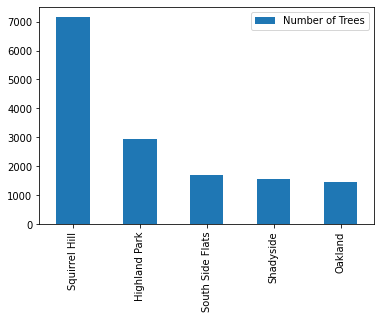

In [2]:
import pandas as pd
import numpy as np

trees = pd.read_csv('Trees.csv')

i = 0
temp_num = 0
num_of_trees = []
neighborhoods = []
while(i < len(trees)):
    if(trees.loc[i,'neighborhood'] in neighborhoods):
        temp_num = num_of_trees[neighborhoods.index(trees.loc[i,'neighborhood'])]
        temp_num += 1
        num_of_trees[neighborhoods.index(trees.loc[i,'neighborhood'])] = temp_num
        i += 1
    else:
        temp_num = 1
        neighborhoods.append(trees.loc[i,'neighborhood'])
        num_of_trees.append(temp_num)
        i += 1
        
num_of_trees[neighborhoods.index("Squirrel Hill North")] += num_of_trees[neighborhoods.index("Squirrel Hill South")]
del(num_of_trees[neighborhoods.index("Squirrel Hill South")])
del(neighborhoods[neighborhoods.index("Squirrel Hill South")])
neighborhoods[neighborhoods.index("Squirrel Hill North")] = "Squirrel Hill"

num_of_trees[neighborhoods.index("Central Oakland")] += num_of_trees[neighborhoods.index("South Oakland")]
num_of_trees[neighborhoods.index("Central Oakland")] += num_of_trees[neighborhoods.index("North Oakland")]
num_of_trees[neighborhoods.index("Central Oakland")] += num_of_trees[neighborhoods.index("West Oakland")]
del(num_of_trees[neighborhoods.index("South Oakland")])
del(neighborhoods[neighborhoods.index("South Oakland")])
del(num_of_trees[neighborhoods.index("North Oakland")])
del(neighborhoods[neighborhoods.index("North Oakland")])
del(num_of_trees[neighborhoods.index("West Oakland")])
del(neighborhoods[neighborhoods.index("West Oakland")])
neighborhoods[neighborhoods.index("Central Oakland")] = "Oakland"

sums = pd.DataFrame(num_of_trees, index=neighborhoods, columns = ["Number of Trees"])
sums.sort_values(by=["Number of Trees"], inplace=True, ascending=False)

sums.head(5).plot.bar()

# Rationale
I chose to use the number of smart trash cans as a metric of neighborhood quality because it implies the following

- That there is enough environmentalist sentiment amongst the population so that such an effort would be appreciated by the local populace seen as useful and not as a "waste" of tax money compared to other projects more focused on day-to-day needs
- That the city views the neighborhood as tourist-friendly enough that the cultivation and maintenence of trees in it would provide a return on investment due to it being attractive enough for tourists and/or locals from other neighborhoods to walk around and provide patronage to local businesses.


# Code Explanation
The above code does the following:

1. Creates a dataframe from the CSV file
2. Condenses the data so that the columns are neighborhoods and not individual trees, and that all the trees for said neighborhood are the rows
3. Combines "divided" neighborhoods (North/South Squrrel Hill, North/South/Central/West Oakland) into singular neighborhoods to keep the data points consistent with other data sets classifications of neighborhoods
4. Creates a bar graph of the top five neighborhoods in terms of the number of trees

# Analysis and Conclusion
While the number of parking meters is indicative of historical investment from the city, and the smart-trash-cans, being a newer development, represent the city's current willingness to invest in it, the number of trees in a neighborhood encapsulates both, as trees live for a long time, and the need for routine maintenence on them does not decrease with time. As the graph shows, Squirrel Hill, being in first by a longshot, shows that the city is willing to invest the most money into it over long periods of time. This shows a faith in the neighborhood by the city in its prospects for stability, as permenant, maintenence-heavy projects are considered viable. The reason why this data point was kept despite being an outlier was because; while omitting Oakland from the meter conclusion allowed one to see how Squirrel Hill remains competitive in that metric, keeping Squirrel Hill as an outlier here demonstrates that same point, albeit through a large gap compared to other neighborhoods.